## Linear regression, cost function, gradient descent

author: massimiliano.canosi \
date: 2024/06/18 \
place: Milan 

In [7]:
import numpy as np
import math, copy 
import matplotlib.pyplot as plt 
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use(r'c:\Users\massimiliano.canosi\OneDrive - Adecco\Machine Learning - Stanford Course\deeplearning.mplstyle')

### Training Set

In [8]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([3,5,7,9,11,13,15,17,19,21])

### Compute cost

In [9]:
def compute_cost(x,y,w,b):

    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
        to fit the data points in x and y
    """

    m = x.shape[0]
    cost = 0 

    for i in range(m):

        f_wb = w * x[i] + b 

        cost = cost + (f_wb - y[i])**2

    total_cost = 1/(2*m)*cost

    return total_cost

### Compute gradient

In [10]:
def compute_gradient(x,y,w,b):

    m = x.shape[0]

    dj_dw = 0
    dj_db = 0 

    for i in range(m):

        f_wb = w * x[i] + b 

        dj_dw_i = (f_wb - y[i]) * x[i]

        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i

        dj_db += dj_db_i

    dj_dw = dj_dw/m 
    dj_db = dj_db/m 

    return dj_dw, dj_db

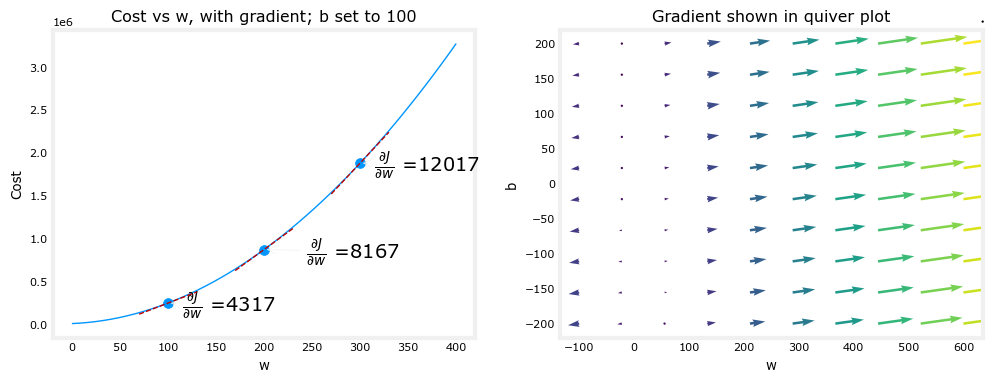

In [11]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

### Gradient Descent

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
        x (ndarray (m,))  : Data, m examples 
        y (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters  
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        gradient_function: function to call to produce gradient

    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b] 
    """


    J_history = []
    p_history = []

    b = b_in 
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters 
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}",
                    f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}",
                    f"w: {w:0.3e}, b:{b: 0.5e}"
                )
            
    return w, b, J_history, p_history

In [13]:
w_init = 0 
b_init = 0

iterations = 10
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.27e+01 dj_dw: -8.250e+01, dj_db: -1.200e+01 w: 8.250e-01, b: 1.20000e-01
Iteration    1: Cost 1.21e+01 dj_dw: -5.008e+01, dj_db: -7.342e+00 w: 1.326e+00, b: 1.93425e-01
Iteration    2: Cost 4.48e+00 dj_dw: -3.039e+01, dj_db: -4.515e+00 w: 1.630e+00, b: 2.38573e-01
Iteration    3: Cost 1.68e+00 dj_dw: -1.844e+01, dj_db: -2.798e+00 w: 1.814e+00, b: 2.66553e-01
Iteration    4: Cost 6.53e-01 dj_dw: -1.119e+01, dj_db: -1.756e+00 w: 1.926e+00, b: 2.84109e-01
Iteration    5: Cost 2.73e-01 dj_dw: -6.785e+00, dj_db: -1.123e+00 w: 1.994e+00, b: 2.95336e-01
Iteration    6: Cost 1.32e-01 dj_dw: -4.111e+00, dj_db: -7.383e-01 w: 2.035e+00, b: 3.02718e-01
Iteration    7: Cost 8.06e-02 dj_dw: -2.488e+00, dj_db: -5.048e-01 w: 2.060e+00, b: 3.07766e-01
Iteration    8: Cost 6.14e-02 dj_dw: -1.502e+00, dj_db: -3.629e-01 w: 2.075e+00, b: 3.11396e-01
Iteration    9: Cost 5.42e-02 dj_dw: -9.038e-01, dj_db: -2.767e-01 w: 2.084e+00, b: 3.14162e-01
(w,b) found by gradient descent: (  2.08

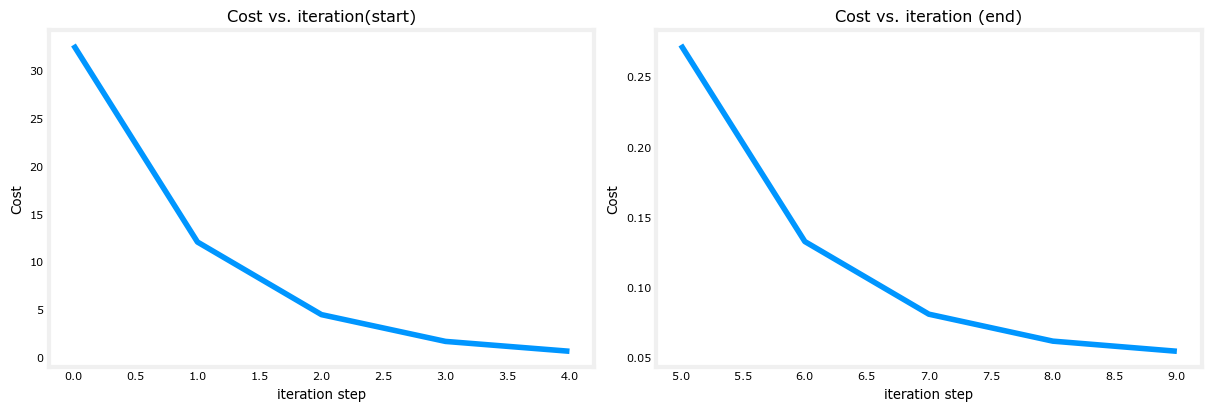

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:5])
ax2.plot(5 + np.arange(len(J_hist[5:])), J_hist[5:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [1]:
print(f"prediction for {w_final*11 + b_final:0.1f}")
print(f"prediction for {w_final*12 + b_final:0.1f}")
print(f"prediction for {w_final*13 + b_final:0.1f}")

NameError: name 'w_final' is not defined